In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [4]:
uri = '~/Desktop/my_machine_learning/csv/advertising.csv'

In [5]:
df = pd.read_csv(uri, encoding='utf-8', usecols=['TV', 'Sales'])
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
df.shape

(200, 2)

In [7]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [8]:
x = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

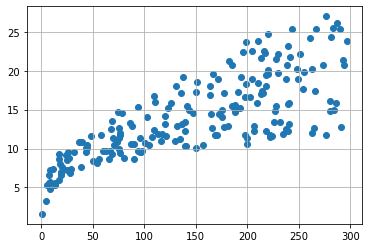

In [9]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
model = LinearRegression()

In [12]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_, model.intercept_

(array([[0.04753664]]), array([7.03259355]))

In [14]:
model.score(x, y)

0.611875050850071

In [15]:
y_predict = model.predict(x)

In [16]:
mean_squared_error(y, y_predict)

10.512652915656757

In [17]:
mean_absolute_error(y, y_predict)

2.549806038927486

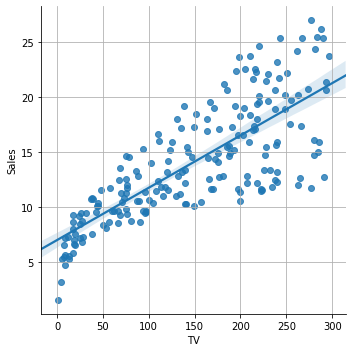

In [18]:
sb.lmplot(x='TV', y='Sales', data=df)
plt.grid()
plt.show()

In [19]:
x_input = [300, 500, 1000]
x_input = np.array(x_input).reshape(-1, 1)

In [20]:
y_predict = model.predict(x_input)
y_predict

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

In [21]:
df = pd.read_csv(uri, index_col=0, encoding='utf-8')
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


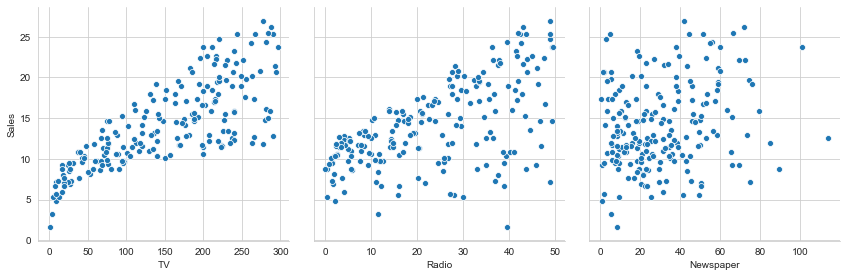

In [22]:
sb.set_style('whitegrid')
sb.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)

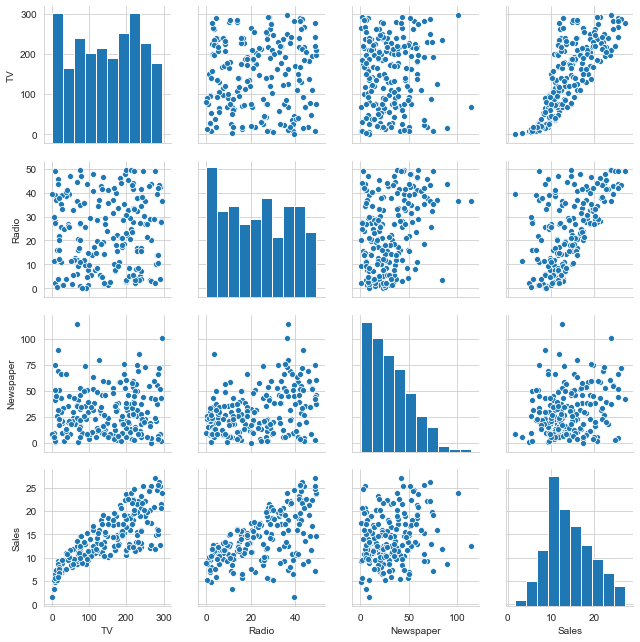

In [23]:
g = sb.pairplot(df)
g.fig.set_size_inches(9, 9)

In [24]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df['Sales']

In [25]:
model = LinearRegression()

In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [28]:
model.intercept_

2.9388893694594085

In [29]:
model.score(X, y)

0.8972106381789521

In [30]:
x_input = [[300, 0, 0], [0, 300, 0], [0, 0, 300], [100, 200, 200], [100, 200, 0]]

In [31]:
model.predict(x_input)

array([16.66828301, 59.49789444,  2.62764146, 45.01385869, 45.2213573 ])

In [32]:
uri = '~/Desktop/my_machine_learning/csv/gdp4c.csv'

In [33]:
df = pd.read_csv(uri, index_col=0)
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [34]:
df.shape

(58, 4)

In [35]:
df.describe()

,SGP,THA,USA,VNM
count,5.800000e+01,5.800000e+01,5.800000e+01,3.300000e+01
mean,8.043585e+10,1.227440e+11,6.991516e+12,6.878553e+10
std,1.007247e+11,1.353708e+11,5.857794e+12,6.664636e+10
min,7.044623e+08,2.760747e+09,5.433000e+11,6.293305e+09
25%,5.320927e+09,1.399794e+10,1.583852e+12,2.465747e+10
50%,2.788040e+10,6.695904e+10,5.455160e+12,3.506411e+10
75%,9.937334e+10,1.719910e+11,1.137740e+13,1.060150e+11
max,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [36]:
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

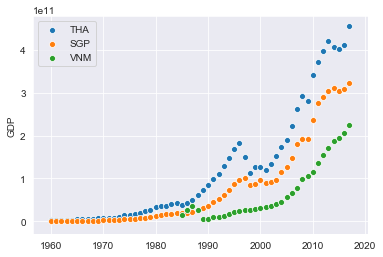

In [37]:
sb.set_style('darkgrid')
sb.scatterplot(df.index, df['THA'], label='THA')
sb.scatterplot(df.index, df['SGP'], label='SGP')
sb.scatterplot(df.index, df['VNM'], label='VNM')
plt.ylabel('GDP')
plt.show()

In [38]:
x = df.index.values.reshape(-1, 1)
y = df['THA']

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

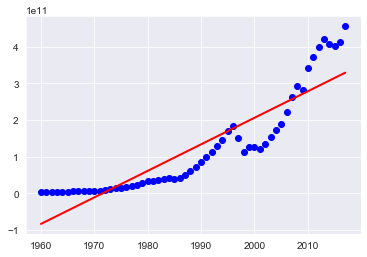

In [41]:
y_predict = model.predict(x)
plt.scatter(x, y, color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [42]:
print('R2 = {:.5f}'.format(model.score(x, y)))
print('MSE = {:.4e}'.format(mean_squared_error(y, y_predict)))
print('RMSE = {:.4e}'.format(np.sqrt(mean_squared_error(y, y_predict))))

R2 = 0.81300
MSE = 3.3677e+21
RMSE = 5.8032e+10


In [43]:
y_predict = model.predict([[2020]])
print('{:.6e}'.format(y_predict[0]))

3.504274e+11


In [44]:
# Workshop 7

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_predict = model.predict(x_poly)

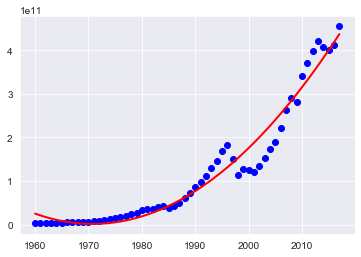

In [50]:
plt.scatter(x, y, color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [51]:
print('R2 = {:.5f}'.format(model.score(x_poly, y)))

R2 = 0.95797


In [52]:
x_input = [2015, 2018, 2020]
x_input = np.array(x_input).reshape(-1, 1)
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
for val in y_poly_pred:
    print('{:.4e}'.format(val))

4.0035e+11
4.5629e+11
4.9563e+11


In [53]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [54]:
x = df.index.values.reshape(-1, 1)
y = df['SGP'].values.reshape(-1, 1)

In [55]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_predict = model.predict(x)

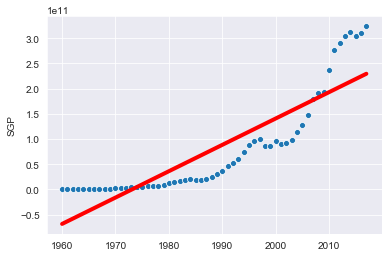

In [57]:
sb.set_style('darkgrid')
sb.scatterplot(df.index, df['SGP'])
plt.plot(df.index, y_predict, linewidth=4, color='r')
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_featuers2 = PolynomialFeatures(degree=3)

In [60]:
x_poly = poly_featuers2.fit_transform(x)

In [61]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_predict = model.predict(x_poly)

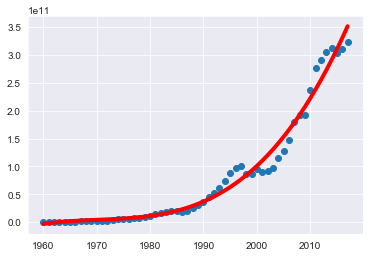

In [63]:
plt.scatter(x, y)
plt.plot(x, y_predict, linewidth=4, color='r')
plt.show()

In [64]:
x_input = [2015, 2018, 2020]
x_input = np.array(x_input).reshape(-1, 1)

In [65]:
y_poly_pred = model.predict(poly_featuers2.fit_transform(x_input))

for val in y_poly_pred:
    print('{}'.format(val))

[3.10231183e+11]
[3.73322597e+11]
[4.19952636e+11]


In [66]:
# Workshop 8

In [69]:
df = pd.read_csv('~/Desktop/my_machine_learning/csv/covid19.csv')
df.tail()

,date,newcase,death
77,03/18/2020,35,0
78,03/19/2020,60,0
79,03/20/2020,50,0
80,03/21/2020,89,0
81,03/22/2020,188,0


In [72]:
df.dtypes

date       object
newcase     int64
death       int64
dtype: object

In [73]:
df = df[(df.index >= 67)]
df

,date,newcase,death
67,03/08/2020,0,0
68,03/09/2020,0,0
69,03/10/2020,3,0
70,03/11/2020,6,0
71,03/12/2020,11,0
72,03/13/2020,5,0
73,03/14/2020,7,0
74,03/15/2020,32,0
75,03/16/2020,33,0
76,03/17/2020,30,0


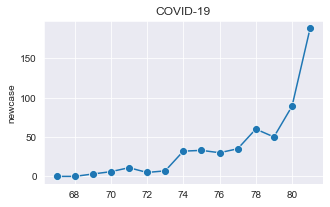

In [75]:
plt.figure(figsize=(5, 3))
sb.lineplot(df.index, 'newcase', data=df, marker='o', markersize=8)
plt.title('COVID-19')
plt.show()

In [76]:
x = df.index.values.reshape(-1, 1)
y = df['newcase']
x, y

(array([[67],
        [68],
        [69],
        [70],
        [71],
        [72],
        [73],
        [74],
        [75],
        [76],
        [77],
        [78],
        [79],
        [80],
        [81]]), 67      0
 68      0
 69      3
 70      6
 71     11
 72      5
 73      7
 74     32
 75     33
 76     30
 77     35
 78     60
 79     50
 80     89
 81    188
 Name: newcase, dtype: int64)

In [80]:
poly_feature = PolynomialFeatures(degree=3)
x_poly = poly_feature.fit_transform(x)

In [81]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_poly_pred = model.predict(x_poly)

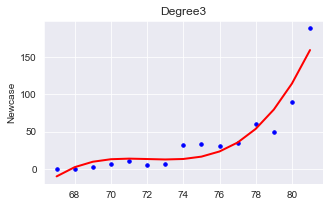

In [83]:
sb.set_style('darkgrid')
plt.figure(figsize=(5, 3))
plt.scatter(x, y, color='b', s=12)
plt.plot(x, y_poly_pred, linewidth='2', color='r')
plt.ylabel('Newcase')
plt.title('Degree3')
plt.show()

In [84]:
x_input = [81, 90, 110, 140]
x_input = np.array(x_input).reshape(-1, 1)

In [85]:
y_poly_pred = model.predict(poly_feature.transform(x_input))
y_poly_pred

array([  158.73888895,  1225.76404551, 11558.1388968 , 66365.33169383])

In [86]:
for val in y_poly_pred:
    print('{:.0f}'.format(val))

159
1226
11558
66365
